# **1. Import Library**

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Sumber :https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data

   saya memakai BMW




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from google.colab import files
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os

# **3. Memuat Dataset**

# Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

# Baca CSV
df = pd.read_csv(filename)

Saving bmw.csv to bmw (3).csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
print("\n=== Bentuk Dataset ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


=== Bentuk Dataset ===
Jumlah baris: 10781
Jumlah kolom: 9


In [5]:
# Informasi dataset
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [6]:
# Nama-nama kolom
print("\n=== Nama Kolom ===")
print(df.columns.tolist())


=== Nama Kolom ===
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [7]:
# Statistik untuk kolom numerik
print("\n=== Statistik Deskriptif ===")
df.describe()


=== Statistik Deskriptif ===


,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
# Statistik untuk kolom kategorikal
print("\n=== Statistik Kategorikal ===")
df.describe(include='object')


=== Statistik Kategorikal ===


,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


In [9]:
# Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [10]:
# Persentase missing values
print("\n=== Persentase Missing Values ===")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct)


=== Persentase Missing Values ===
model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64


In [11]:
# Cek duplikasi
print("\n=== Duplikasi ===")
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")


=== Duplikasi ===
Jumlah baris duplikat: 117


In [12]:
# Lihat data yang duplikat (kalau ada)
if df.duplicated().sum() > 0:
    print("\n=== Data yang Duplikat ===")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))


=== Data yang Duplikat ===
          model  year  price transmission  mileage fuelType  tax   mpg  \
7607   1 Series  2015   8490       Manual    50000   Petrol  125  50.4   
7783   1 Series  2015   8490       Manual    50000   Petrol  125  50.4   
5206   1 Series  2016  14652       Manual     9461   Diesel   20  70.6   
5617   1 Series  2016  14652       Manual     9461   Diesel   20  70.6   
2684   1 Series  2016  20990       Manual       10   Diesel   20  68.9   
...         ...   ...    ...          ...      ...      ...  ...   ...   
5883         X5  2019  51995    Semi-Auto       11   Diesel  145  37.7   
5796         X5  2019  52990    Semi-Auto       10   Diesel  150  37.7   
5817         X5  2019  52990    Semi-Auto       10   Diesel  150  37.7   
2263         Z4  2020  35850    Semi-Auto        5   Petrol  145  37.2   
2642         Z4  2020  35850    Semi-Auto        5   Petrol  145  37.2   

      engineSize  
7607         1.6  
7783         1.6  
5206         1.5  
5617   

In [13]:
# Lihat kolom kategorikal
print("\n=== Kolom Kategorikal ===")
print(df.select_dtypes(include='object').columns.tolist())


=== Kolom Kategorikal ===
['model', 'transmission', 'fuelType']


In [14]:
# Unique values per kolom kategorikal
print("\n=== Unique Values ===")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


=== Unique Values ===

model:
model
3 Series    2443
1 Series    1969
2 Series    1229
5 Series    1056
4 Series     995
X1           804
X3           551
X5           468
X2           288
X4           179
M4           125
6 Series     108
Z4           108
7 Series     106
X6           106
X7            55
i3            43
8 Series      39
M5            29
M3            27
M2            21
i8            17
M6             8
Z3             7
Name: count, dtype: int64

transmission:
transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64

fuelType:
fuelType
Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: count, dtype: int64


In [15]:
# Lihat kolom numerik
print("\n=== Kolom Numerik ===")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())


=== Kolom Numerik ===
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [16]:
# Distribusi setiap kolom numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\n=== {col} ===")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median()}")


=== year ===
Min: 1996
Max: 2020
Mean: 2017.08
Median: 2017.0

=== price ===
Min: 1200
Max: 123456
Mean: 22733.41
Median: 20462.0

=== mileage ===
Min: 1
Max: 214000
Mean: 25496.99
Median: 18347.0

=== tax ===
Min: 0
Max: 580
Mean: 131.70
Median: 145.0

=== mpg ===
Min: 5.5
Max: 470.8
Mean: 56.40
Median: 53.3

=== engineSize ===
Min: 0.0
Max: 6.6
Mean: 2.17
Median: 2.0


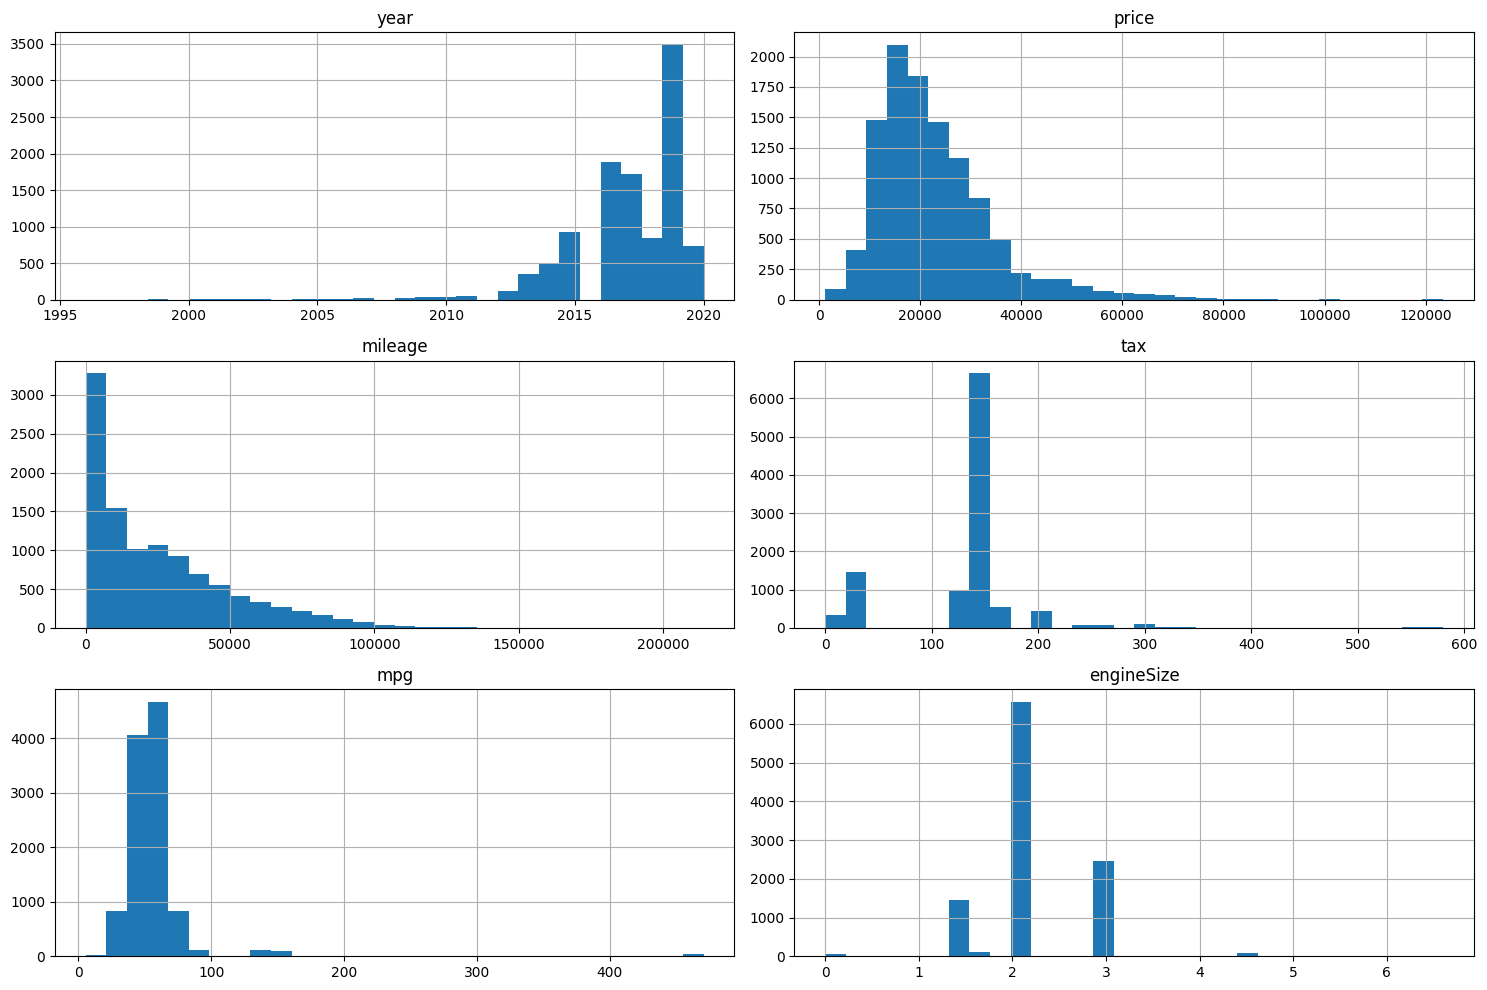

In [17]:
# Histogram untuk kolom numerik
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

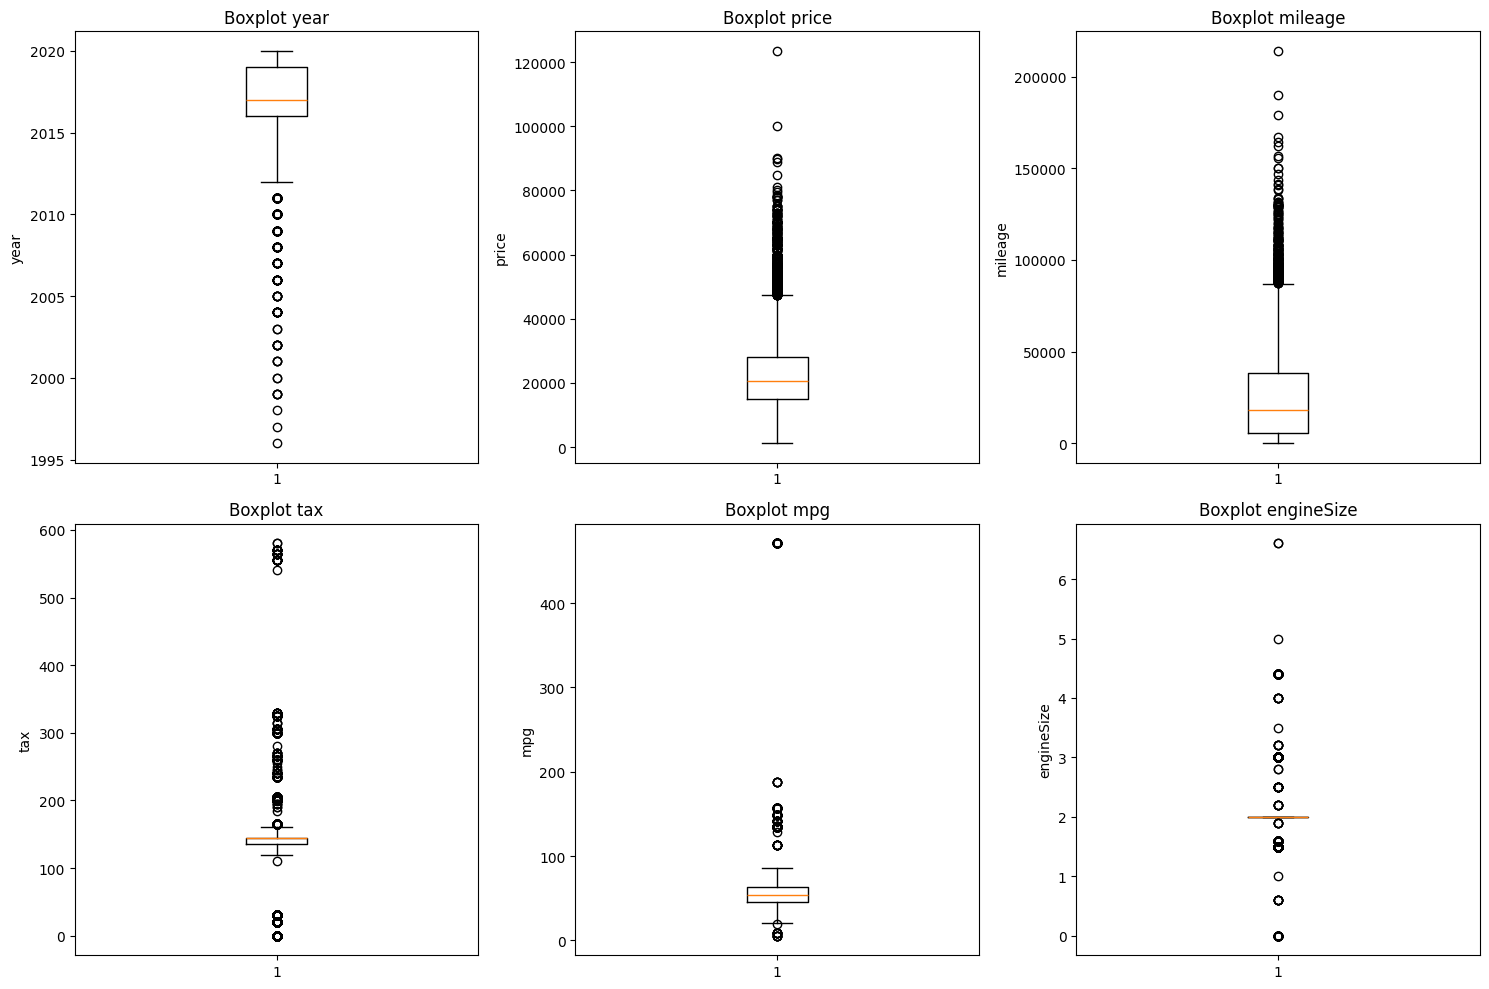

In [18]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [19]:
# Cek apakah ada nilai negatif
print("\n=== Cek Nilai Negatif ===")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    negative = (df[col] < 0).sum()
    if negative > 0:
        print(f"{col}: Ada {negative} nilai negatif")
    else:
        print(f"{col}: Tidak ada nilai negatif")


=== Cek Nilai Negatif ===
year: Tidak ada nilai negatif
price: Tidak ada nilai negatif
mileage: Tidak ada nilai negatif
tax: Tidak ada nilai negatif
mpg: Tidak ada nilai negatif
engineSize: Tidak ada nilai negatif


In [20]:
# Cek nilai 0
print("\n=== Cek Nilai 0 ===")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    zeros = (df[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: Ada {zeros} nilai 0 ({zeros/len(df)*100:.2f}%)")


=== Cek Nilai 0 ===
tax: Ada 340 nilai 0 (3.15%)
engineSize: Ada 47 nilai 0 (0.44%)


In [21]:
# Analisis engineSize = 0 lebih detail
print("\n=== Analisis EngineSize = 0 ===")
zero_engine = df[df['engineSize'] == 0]
print(f"Total: {len(zero_engine)} mobil ({len(zero_engine)/len(df)*100:.2f}%)\n")

# Lihat model dan fuel type
print("Model dan Fuel Type untuk engineSize = 0:")
print(zero_engine[['model', 'year', 'fuelType', 'engineSize', 'mpg']].head(10))


=== Analisis EngineSize = 0 ===
Total: 47 mobil (0.44%)

Model dan Fuel Type untuk engineSize = 0:
     model  year fuelType  engineSize    mpg
621     i3  2017   Hybrid         0.0  470.8
778     i3  2017   Hybrid         0.0  470.8
780     i3  2017   Hybrid         0.0  470.8
1866    i3  2017   Hybrid         0.0  470.8
2352    i3  2016   Hybrid         0.0  470.8
3277    i3  2016   Hybrid         0.0  470.8
3628    i3  2015   Hybrid         0.0  470.8
3913    i3  2017   Hybrid         0.0  470.8
4100    i3  2017   Hybrid         0.0  470.8
4109    i3  2015   Hybrid         0.0  470.8


In [22]:
# Lihat contoh data dengan nilai 0 (pilih satu kolom)
# Misalnya untuk kolom 'tax'
print("\n=== Contoh Data dengan tax = 0 ===")
print(df[df['tax'] == 0].head(10))


=== Contoh Data dengan tax = 0 ===
         model  year  price transmission  mileage fuelType  tax    mpg  \
23    1 Series  2016   9400       Manual    44498   Diesel    0   83.1   
32          i3  2016  17100    Automatic    25269    Other    0  470.8   
35    2 Series  2017  13000    Automatic    61818    Other    0  141.2   
48    1 Series  2016   9200       Manual    48858   Diesel    0   83.1   
59    1 Series  2015  11100       Manual    11524   Diesel    0   83.1   
86    2 Series  2017  16000    Automatic    32389    Other    0  141.2   
98    1 Series  2017  11400       Manual    26265   Diesel    0   83.1   
108   2 Series  2016  10600       Manual    24313   Diesel    0   74.3   
109   2 Series  2015   9100       Manual    40789   Diesel    0   74.3   
118         X5  2016  21000    Automatic    71626    Other    0   85.6   

     engineSize  
23          1.5  
32          0.6  
35          1.5  
48          1.5  
59          1.5  
86          1.5  
98          1.5  
108  

In [23]:
# Correlation matrix - HANYA untuk kolom numerik
print("\n=== Correlation Matrix ===")

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation = numerical_df.corr()
print(correlation)


=== Correlation Matrix ===
                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.623756 -0.774382  0.025200 -0.071762   -0.026337
price       0.623756  1.000000 -0.605397  0.263484 -0.204882    0.460196
mileage    -0.774382 -0.605397  1.000000 -0.170747  0.118609   -0.002540
tax         0.025200  0.263484 -0.170747  1.000000 -0.351798    0.429616
mpg        -0.071762 -0.204882  0.118609 -0.351798  1.000000   -0.399844
engineSize -0.026337  0.460196 -0.002540  0.429616 -0.399844    1.000000


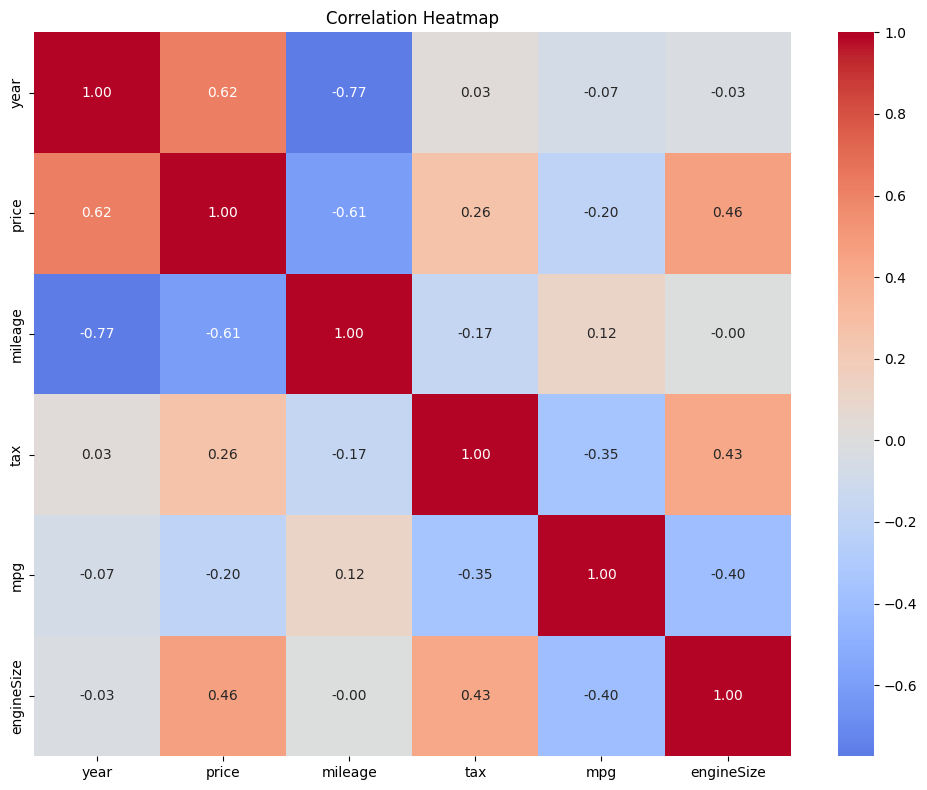

In [24]:
# Heatmap korelasi - HANYA untuk kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

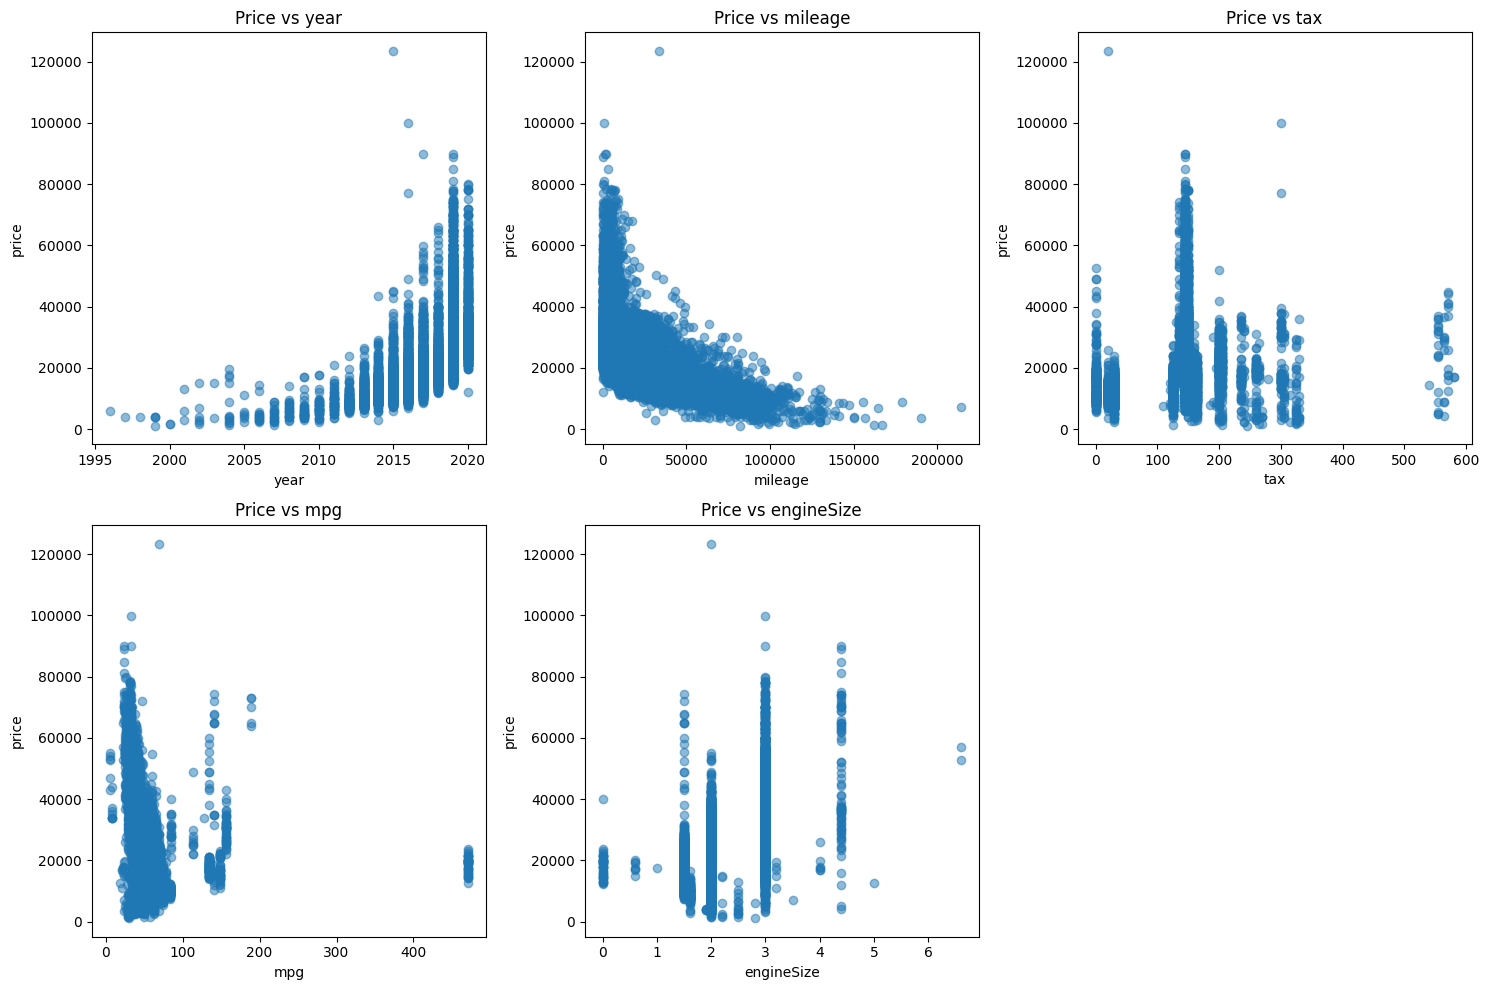

In [25]:
# Scatter plot: price vs kolom lain
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[col], df['price'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

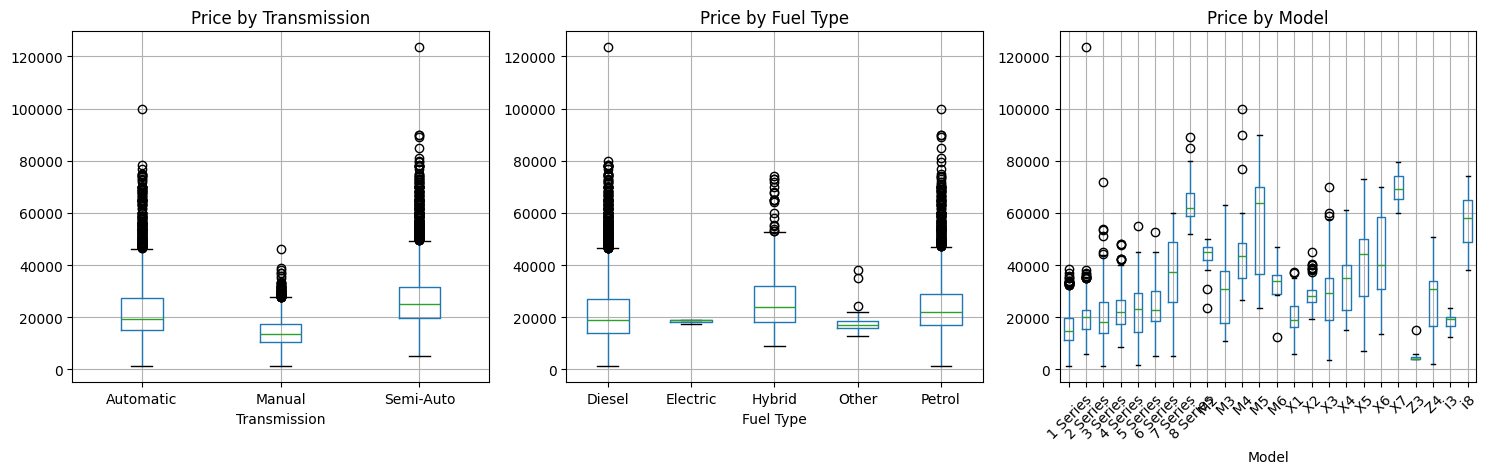

In [26]:
# Boxplot: price vs kategorikal
plt.figure(figsize=(15, 5))

# Price vs transmission
plt.subplot(1, 3, 1)
df.boxplot(column='price', by='transmission', ax=plt.gca())
plt.title('Price by Transmission')
plt.suptitle('')  # Hapus title default
plt.xlabel('Transmission')

# Price vs fuelType
plt.subplot(1, 3, 2)
df.boxplot(column='price', by='fuelType', ax=plt.gca())
plt.title('Price by Fuel Type')
plt.suptitle('')
plt.xlabel('Fuel Type')

# Price vs model
plt.subplot(1, 3, 3)
df.boxplot(column='price', by='model', ax=plt.gca())
plt.title('Price by Model')
plt.suptitle('')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
# --- Pembersihan Data Duplikat ---
print(f"{'='*20} PROSES PEMBERSIHAN DUPLIKAT {'='*20}")

initial_rows = df.shape[0]
# Menghapus duplikat dan mereset indeks dalam satu baris
df_clean = df.drop_duplicates().reset_index(drop=True)

removed_count = initial_rows - df_clean.shape[0]
print(f"Status: {removed_count} baris duplikat telah dibuang.")
print(f"Total data sekarang: {len(df_clean)} baris.\n")

==================== PROSES PEMBERSIHAN DUPLIKAT ====================
Status: 117 baris duplikat telah dibuang.
Total data sekarang: 10664 baris.



In [28]:
print(f"{'='*20} PROSES IMPUTASI ENGINE SIZE {'='*20}")

zero_mask = df_clean['engineSize'] == 0
zero_count = zero_mask.sum()

if zero_count > 0:
    print(f"[STATUS] Terdeteksi {zero_count} baris dengan engineSize = 0.")


    df_clean['engineSize'] = df_clean['engineSize'].replace(0, float('nan'))
    df_clean['engineSize'] = df_clean['engineSize'].fillna(
        df_clean.groupby('model')['engineSize'].transform('median')
    )

    print("[SUCCESS] Imputasi berbasis median per model telah diterapkan.")
    print(f"Sisa nilai 0/NaN: {df_clean['engineSize'].isnull().sum()}")
else:
    print("[INFO] Tidak ditemukan engineSize bernilai 0. Melewati tahap ini.")

==================== PROSES IMPUTASI ENGINE SIZE ====================
[STATUS] Terdeteksi 47 baris dengan engineSize = 0.
[SUCCESS] Imputasi berbasis median per model telah diterapkan.
Sisa nilai 0/NaN: 0


In [29]:
# --- Identifikasi Pencilan (Outliers) ---
print(f"{'='*20} ANALISIS OUTLIER (METODE IQR) {'='*20}")

def get_outlier_stats(df, columns):
    """Fungsi untuk merangkum statistik outlier ke dalam DataFrame"""
    summary_list = []

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        low_limit = q1 - (1.5 * iqr)
        high_limit = q3 + (1.5 * iqr)

        # Identifikasi baris outlier
        outliers = df[(df[col] < low_limit) | (df[col] > high_limit)]

        summary_list.append({
            'Fitur': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Batas Bawah': low_limit,
            'Batas Atas': high_limit,
            'Jumlah Outlier': len(outliers),
            'Persentase (%)': round((len(outliers) / len(df)) * 100, 2)
        })

    return pd.DataFrame(summary_list)

# Menjalankan fungsi deteksi
cols_to_check = ['price', 'mileage', 'mpg', 'tax']
outlier_report = get_outlier_stats(df_clean, cols_to_check)

print("\nRingkasan Deteksi Outlier:")
print(outlier_report.to_string(index=False))
print("-" * 60)

==================== ANALISIS OUTLIER (METODE IQR) ====================

Ringkasan Deteksi Outlier:
  Fitur       Q1      Q3      IQR  Batas Bawah  Batas Atas  Jumlah Outlier  Persentase (%)
  price 14897.00 27890.0 12993.00    -4592.500   47379.500             478            4.48
mileage  5665.75 38436.5 32770.75   -43490.375   87592.625             293            2.75
    mpg    45.60    62.8    17.20       19.800      88.600             274            2.57
    tax   135.00   145.0    10.00      120.000     160.000            2722           25.53
------------------------------------------------------------


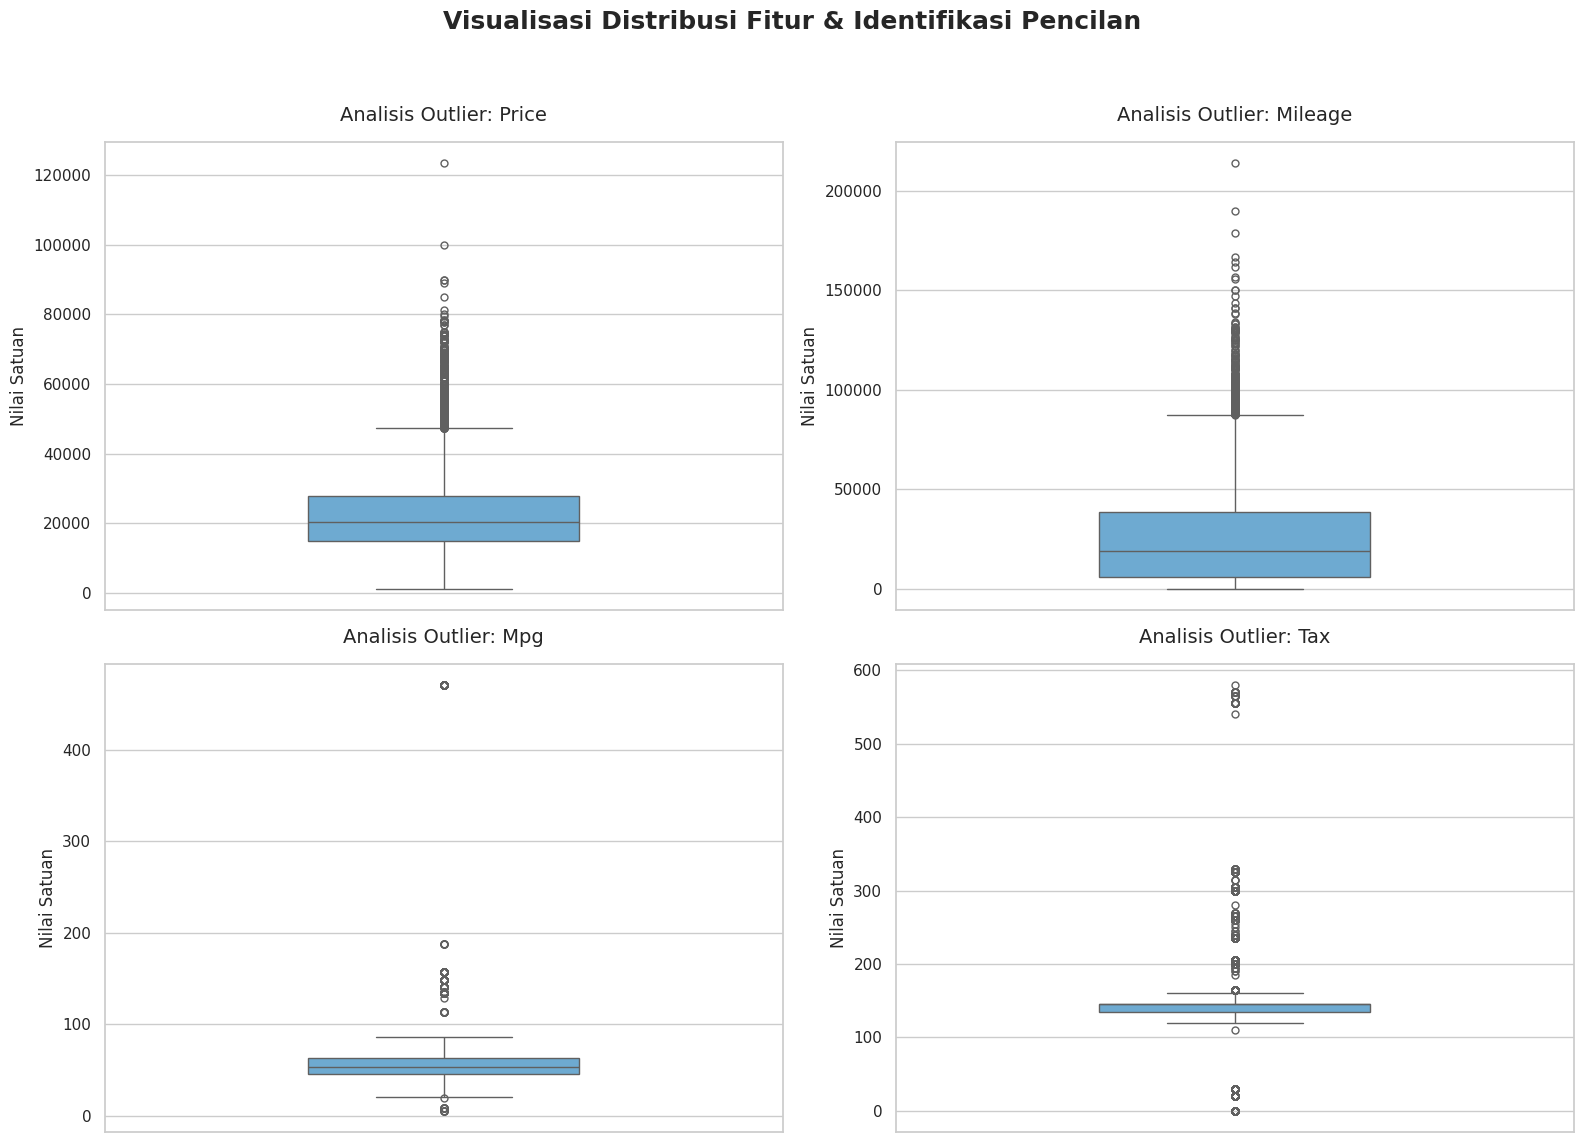

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

target_features = ['price', 'mileage', 'mpg', 'tax']

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Visualisasi Distribusi Fitur & Identifikasi Pencilan', fontsize=18, fontweight='bold', y=0.98)

for idx, col in enumerate(target_features):
    ax = axes.flatten()[idx]

    sns.boxplot(data=df_clean, y=col, ax=ax, color='#5dade2', width=0.4, fliersize=5)

    ax.set_title(f'Analisis Outlier: {col.title()}', fontsize=14, pad=15)
    ax.set_ylabel('Nilai Satuan', fontsize=12)
    ax.set_xlabel('')

    if 'outlier_summary' in globals():
        stats = outlier_summary[col]
        info_box = f"Outliers: {stats['n_outliers']} ({stats['pct_outliers']:.1f}%)"
        ax.text(0.95, 0.95, info_box, transform=ax.transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='#bdc3c7'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [31]:
# --- Eksekusi Pembersihan Outlier ---
print(f"{'='*20} PROSES PEMBERSIHAN OUTLIER {'='*20}")

def remove_outliers(df, columns):
    """
    Menghapus baris yang mengandung outlier berdasarkan kolom yang ditentukan.
    """
    initial_count = len(df)

    # Membuat salinan data agar data asli tidak terganggu
    filtered_df = df.copy()

    for col in columns:
        q1 = filtered_df[col].quantile(0.25)
        q3 = filtered_df[col].quantile(0.75)
        iqr = q3 - q1

        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        # Filter data: hanya ambil yang berada di dalam batas (inner fences)
        filtered_df = filtered_df[
            (filtered_df[col] >= lower_limit) &
            (filtered_df[col] <= upper_limit)
        ]

        print(f"[CLEANUP] Fitur '{col}': Selesai diproses.")

    final_count = len(filtered_df)
    removed = initial_count - final_count

    print(f"\n[RINGKASAN]")
    print(f"- Data Awal       : {initial_count} baris")
    print(f"- Data Dihapus    : {removed} baris")
    print(f"- Data Akhir      : {final_count} baris")
    print(f"- Reduksi         : {(removed/initial_count)*100:.2f}%")

    return filtered_df.reset_index(drop=True)

# Menjalankan pembersihan
df_clean = remove_outliers(df_clean, target_features)

==================== PROSES PEMBERSIHAN OUTLIER ====================
[CLEANUP] Fitur 'price': Selesai diproses.
[CLEANUP] Fitur 'mileage': Selesai diproses.
[CLEANUP] Fitur 'mpg': Selesai diproses.
[CLEANUP] Fitur 'tax': Selesai diproses.

[RINGKASAN]
- Data Awal       : 10664 baris
- Data Dihapus    : 5776 baris
- Data Akhir      : 4888 baris
- Reduksi         : 54.16%


In [32]:
# =====================================================
# STEP 6: ENCODING DATA KATEGORIKAL
# =====================================================

print("="*60)
print("STEP 6: ENCODING DATA KATEGORIKAL")
print("="*60)

from sklearn.preprocessing import LabelEncoder

# Kolom kategorikal
categorical_cols = ['model', 'transmission', 'fuelType']

# Simpan mapping untuk dokumentasi
encoding_mapping = {}

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"   Unique values sebelum: {df_clean[col].unique()}")

    # Label Encoding
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])

    # Simpan mapping
    encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    print(f"   Mapping: {encoding_mapping[col]}")
    print(f" {col} berhasil di-encode")

print("\n Semua kolom kategorikal berhasil di-encode\n")

STEP 6: ENCODING DATA KATEGORIKAL

model:
   Unique values sebelum: [' 6 Series' ' 1 Series' ' 2 Series' ' X3' ' 3 Series' ' X1' ' 5 Series'
 ' X4' ' 4 Series' ' X6' ' 7 Series' ' X5' ' X2' ' M4' ' Z4' ' M2' ' M3'
 ' M6']
   Mapping: {' 1 Series': np.int64(0), ' 2 Series': np.int64(1), ' 3 Series': np.int64(2), ' 4 Series': np.int64(3), ' 5 Series': np.int64(4), ' 6 Series': np.int64(5), ' 7 Series': np.int64(6), ' M2': np.int64(7), ' M3': np.int64(8), ' M4': np.int64(9), ' M6': np.int64(10), ' X1': np.int64(11), ' X2': np.int64(12), ' X3': np.int64(13), ' X4': np.int64(14), ' X5': np.int64(15), ' X6': np.int64(16), ' Z4': np.int64(17)}
 model berhasil di-encode

transmission:
   Unique values sebelum: ['Automatic' 'Manual' 'Semi-Auto']
   Mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1), 'Semi-Auto': np.int64(2)}
 transmission berhasil di-encode

fuelType:
   Unique values sebelum: ['Petrol' 'Diesel' 'Hybrid']
   Mapping: {'Diesel': np.int64(0), 'Hybrid': np.int64(1), 'Petrol

In [33]:
# Lihat hasil encoding
print("Hasil Encoding:")
print(df_clean[['model', 'model_encoded',
                'transmission', 'transmission_encoded',
                'fuelType', 'fuelType_encoded']].head(10))

Hasil Encoding:
       model  model_encoded transmission  transmission_encoded fuelType  \
0   6 Series              5    Automatic                     0   Petrol   
1   1 Series              0    Automatic                     0   Diesel   
2   2 Series              1       Manual                     1   Petrol   
3         X3             13       Manual                     1   Diesel   
4         X3             13    Automatic                     0   Diesel   
5   3 Series              2    Automatic                     0   Diesel   
6   1 Series              0    Automatic                     0   Petrol   
7   1 Series              0       Manual                     1   Petrol   
8         X1             11    Automatic                     0   Diesel   
9   1 Series              0    Automatic                     0   Petrol   

   fuelType_encoded  
0                 2  
1                 0  
2                 2  
3                 0  
4                 0  
5                 0  
6   

In [34]:
# =====================================================
# STEP 7: FEATURE SCALING
# =====================================================

print("="*60)
print("STEP 7: FEATURE SCALING (STANDARDIZATION)")
print("="*60)

from sklearn.preprocessing import StandardScaler

# Kolom numerik yang akan di-scale (exclude yang sudah encoded)
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Buat scaler
scaler = StandardScaler()

# Scale features
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

print(" Feature scaling selesai\n")

# Lihat hasil
print("Statistik setelah scaling:")
print(df_clean[numerical_features].describe())

STEP 7: FEATURE SCALING (STANDARDIZATION)
 Feature scaling selesai

Statistik setelah scaling:
               year       mileage     tax           mpg    engineSize
count  4.888000e+03  4.888000e+03  4888.0  4.888000e+03  4.888000e+03
mean   3.669005e-14  4.651671e-17     0.0 -2.195007e-16  4.462697e-16
std    1.000102e+00  1.000102e+00     0.0  1.000102e+00  1.000102e+00
min   -6.645913e+00 -8.573029e-01     0.0 -2.559957e+00 -1.325019e+00
25%   -2.185694e-01 -6.612291e-01     0.0 -6.322812e-01 -2.718640e-01
50%    4.955799e-01 -3.724796e-01     0.0 -3.439236e-02 -2.718640e-01
75%    4.955799e-01  3.406499e-01     0.0  7.387397e-01 -2.718640e-01
max    1.209729e+00  4.976596e+00     0.0  3.233379e+00  4.783280e+00


In [36]:
# =====================================================
# STEP 8: SIMPAN DATA BERSIH
# =====================================================

print("\n" + "="*60)
print("STEP 8: SIMPAN DATA HASIL PREPROCESSING")
print("="*60)

# Buat folder jika belum ada
import os
os.makedirs('preprocessing/bmw_clean', exist_ok=True)

# Simpan data
output_path = 'preprocessing/bmw_clean/bmw_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f" Data berhasil disimpan ke: {output_path}")
print(f"   Total data: {len(df_clean)} baris")
print(f"   Total kolom: {df_clean.shape[1]} kolom\n")

print("="*60)
print(" PREPROCESSING SELESAI!")
print("="*60)


STEP 8: SIMPAN DATA HASIL PREPROCESSING
 Data berhasil disimpan ke: preprocessing/bmw_clean/bmw_clean.csv
   Total data: 4888 baris
   Total kolom: 12 kolom

 PREPROCESSING SELESAI!
